# 1. 통계분석
- 01 [기술통계 분석 + 그래프] 와인 품질 등급 예측하기
- 02 [상관 분석 + 히트맵] 타이타닉호 생존율 분석하기
- 03 [회귀분석 실습] tips 데이터

#####  TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type  
##### 가 발생하는 경우가 있습니다. 이것은 pandas 버전과 numpy의 버전이 맞지않은 경우에 발생합니다.
##### 위의 에러가 발생하는 경우에는, 
* (1) pip 버전 업그레이드 : (anaconda prompt "관리자권한 실행" 후) python.exe -m pip install --upgrade pip
* (2) pandas 버전 업그레이드 : (Jupyter Notebook "관리자권한 실행" 후) !pip install pandas --upgrade
* (3) numpy 버전 업그레이드 :  (Jupyter Notebook "관리자권한 실행" 후) !pip install numpy --upgrade
##### 를 하시기 바랍니다.

In [3]:
#경고 알림 무시
import warnings
warnings.filterwarnings(action='ignore')

# 1. 통계분석
## [1] 와인 품질 등급 예측하기

### 1. 데이터 준비
#### 1.1 다운로드한 CSV 파일 정리하기

In [10]:
import pandas as pd
#한글깨짐오류 해결 (encoding utf-8 or euc-kr )
#첫째줄 컬럼명으로 지정
red_df = pd.read_csv('winequality-red.csv', sep = ';', header = 0, engine = 'python') 
white_df = pd.read_csv('winequality-white.csv', sep = ';', header = 0, engine= 'python')

#인덱스가 이중으로 생성되는 것을 막기 위해 index=False로 설정
red_df.to_csv('winequality-red2.csv',index = False)
white_df.to_csv('winequality-white2.csv', index = False)

#### 1.2 데이터 병합하기

In [14]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
#'type'열 추가 전부 red로, 0번째 열 자리에
red_df.insert(0, column = 'type', value = 'red')
red_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### 만약 홀수는 red1, 짝수는 red2로 만들고 싶다면 아래의 두 방법을 사용 가능

##### 방법 1: apply 함수 사용
red_df.insert(0, 'type', red_df.index.to_series().apply(lambda x: 'red1' if x % 2 == 1 else 'red2'))

##### 방법 2: numpy의 where 함수 사용
import numpy as np
red_df.insert(0, 'type', np.where(red_df.index % 2 == 1, 'red1', 'red2'))

In [20]:
red_df.shape
# pandas의 DataFrame에서 **데이터프레임의 크기(행과 열의 수)**를 알려주는 속성
# 행의 수, 열의 수 형태의 튜플을 반환

(1599, 13)

In [22]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [24]:
white_df.insert(0, column = 'type', value = 'white')
white_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [26]:
white_df.shape

(4898, 13)

In [34]:
#열이 동일하다면 행이 아래로 쌓여서 결합되고, 서로 다른 열이 있을 경우 NaN값으로 채워짐
wine = pd.concat([red_df, white_df])

#행끼리 연산 1599+4898 = 6497
wine.shape

(6497, 13)

In [32]:
#기본적인 전처리가 된 wine을 csv형태로 저장한다.
wine.to_csv('wine.csv', index = False)

### 2. 데이터 탐색

In [40]:
# 기본 정보 확인
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [42]:
# 기술 통계 구하기 / 열 이름에 공백을 '_'으로 바꾸기
wine.columns = wine.columns.str.replace(' ', '_')
wine.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [44]:
#기술 통계
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


describe() 함수는 pandas에서 데이터프레임의 기초 통계 정보를 요약해 주는 함수입니다. 이 함수는 기본적으로 수치형 데이터에 대해 통계 요약을 제공하며, 각 열(column)에 대해 다음과 같은 정보를 계산합니다:

count: 데이터 개수 (결측치 제외)
mean: 평균값
std: 표준 편차
min: 최소값
25%: 1사분위수 (데이터의 25%가 이 값보다 작음)
50%: 중위수 또는 2사분위수 (데이터의 50%가 이 값보다 작음)
75%: 3사분위수 (데이터의 75%가 이 값보다 작음)
max: 최대값

In [49]:
# 유일값 출력 / 등급 7개 존재
sorted(wine['quality'].unique())

[3, 4, 5, 6, 7, 8, 9]

In [52]:
# 각 속성 빈도수
wine.quality.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [56]:
# quality가 9인 데이터를 출력하기
wine[wine['quality']==9]

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
774,white,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
820,white,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9
827,white,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
876,white,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
1605,white,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9


In [58]:
wine.loc[wine['quality']==9]

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
774,white,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
820,white,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9
827,white,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
876,white,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
1605,white,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9


### 3. 데이터 모델링
#### 3.1 describe()함수로 그룹 비교하기

In [60]:
# 그룹별 퀄리티 확인
wine.groupby('type')['quality'].describe()

#9가 다 화잍에 있다.

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [62]:
wine.groupby('type')['quality'].mean()

type
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [66]:
#표준편차 확인하기

wine.groupby('type')['quality'].std()

type
red      0.807569
white    0.885639
Name: quality, dtype: float64

In [72]:
# agg를 사용해서 두가지 이상의 함수를 묶어서 출력
wine.groupby('type')['quality'].agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
type,,,,
red,5.636023,0.807569,3,8
white,5.877909,0.885639,3,9


#### 3.2 t-검정과 회귀 분석으로 그룹 비교하기
그룹간 비교를 위해 t-검정 실시

In [74]:
!pip install statsmodels

In [76]:
#T검정시 사용
from scipy import stats
#회귀시 사용
from statsmodels.formula.api import ols, glm

In [78]:
# type이 'red'인 행들에서 quality 열만 선택
red_wine_quality = wine.loc[wine['type'] == 'red', 'quality']

# type이 'white'인 행들에서 quality 열만 선택
white_wine_quality = wine.loc[wine['type'] =='white', 'quality']

In [82]:
#stats.ttest_ind를 이용해 t검정을 실시가호 두 그룹간의 차이를 확인한다.
stats.ttest_ind(red_wine_quality, white_wine_quality, equal_var = False)

TtestResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24, df=2950.750452166697)

#### t 검정 (t-test)
모집단의 분산이나 표준편차를 알지 못할 때, 모집단을 대표하는 표본으로부터 추정된 분산이나 표준편차를 가지고 검정하는 방법으로 “두 모집단의 평균간의 차이는 없다”라는 귀무가설과 “두 모집단의 평균 간에 차이가 있다”라는 대립가설 중에 하나를 선택할 수 있도록 하는 통계적 검정방법이다.

- pvalue는 0.05보다 작기때문에 귀무가설 기각 
- 두 그룹의 품질 차이는 통계적으로 유의함
- 선형 회귀 분석의 종속변수와 독립변수를 구함. 종속 변수는 quality이고, type과 quality를 제외한 11개 속성은 독립 변수가 됨

In [87]:
Rformula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + \
            residual_sugar + chlorides + free_sulfur_dioxide + \
            total_sulfur_dioxide + density + pH + sulphates + alcohol'

# 내가 알고싶어하는 건 quality고, 나머지가 어떤 영향을 주는지 확인하기 위해 사용

In [91]:
# 선형 회귀 모델 중 OLS(ordinary least squares) 모델 사용
regression_result = ols(Rformula, data = wine).fit()
#선형 회귀 관련 통계값 확인
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Thu, 19 Sep 2024   Prob (F-statistic):               0.00
Time:                        10:53:42   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- P-value(p-값) : 각 독립변수의 p-값 확인(p값<0.05 이면 해당 독립변수가 종속 변수에 유의미한 영향을 미친다라고 판단)
- R-squared(결정계수) : 회귀모델의 적합도. 전체 데이터의 29.2%를 회귀분석으로 설명할 수 있다라는 뜻
  - 0.7이상이면 적합하다. 항상 높은 것은 아니고, Adj. R-squared:는 변수를 추가했을 때 과적합을 방지한 값을 나타냄
- F-statistic (F-통계량) 및 P-value : F-statistic과 그에 대한 p-값도 모델의 전반적인 유의성을 확인하는 중요한 지표
- 잔차의 정규성과 오차 항의 독립성
- Coefficients (회귀 계수)

#### 3.3 회귀 분석 모델로 새로운 샘플의 품질 등급 예측하기

In [95]:
#type에서 quality와 type 열을 제외하고 회귀에 사용할 독립 변수만 추출
sample1 = wine[wine.columns.difference(['quality', 'type'])]
sample1.head(10)

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70
1,9.8,0.098,0.00,0.9968,7.8,25.0,3.20,2.6,0.68,67.0,0.88
2,9.8,0.092,0.04,0.9970,7.8,15.0,3.26,2.3,0.65,54.0,0.76
3,9.8,0.075,0.56,0.9980,11.2,17.0,3.16,1.9,0.58,60.0,0.28
4,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70
5,9.4,0.075,0.00,0.9978,7.4,13.0,3.51,1.8,0.56,40.0,0.66
6,9.4,0.069,0.06,0.9964,7.9,15.0,3.30,1.6,0.46,59.0,0.60
7,10.0,0.065,0.00,0.9946,7.3,15.0,3.39,1.2,0.47,21.0,0.65
8,9.5,0.073,0.02,0.9968,7.8,9.0,3.36,2.0,0.57,18.0,0.58
9,10.5,0.071,0.36,0.9978,7.5,17.0,3.35,6.1,0.80,102.0,0.50


In [99]:
# 샘플 데이터 5행으로 추리기
# 5개 행의, 모든 열을 가져오기

sample1 = sample1[0:5][:]
sample1.head(10)

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70
1,9.8,0.098,0.00,0.9968,7.8,25.0,3.20,2.6,0.68,67.0,0.88
2,9.8,0.092,0.04,0.9970,7.8,15.0,3.26,2.3,0.65,54.0,0.76
3,9.8,0.075,0.56,0.9980,11.2,17.0,3.16,1.9,0.58,60.0,0.28
4,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70


In [101]:
#결과 예측
sample1_predict = regression_result.predict(sample1)
sample1_predict

0    4.997607
1    4.924993
2    5.034663
3    5.680333
4    4.997607
dtype: float64

In [103]:
wine[0:5]['quality']

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

#### 임의의 data로 샘플 만들기

In [110]:
#회귀식에 사용할 독립 변수에 대입할 임의의 값을 딕셔너리 형태로 만듬

data = {"fixed_acidity" : [8.5, 8.1], "volatile_acidity":[0.8, 0.5],
"citric_acid":[0.3, 0.4], "residual_sugar":[6.1, 5.8], "chlorides":[0.055,
0.04], "free_sulfur_dioxide":[30.0, 31.0], "total_sulfur_dioxide":[98.0,
99], "density":[0.996, 0.91], "pH":[3.25, 3.01], "sulphates":[0.4, 0.35],
"alcohol":[9.0, 0.88]}

In [112]:
sample2 = pd.DataFrame(data, columns = sample1.columns)
sample2

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.00,0.055,0.3,0.996,8.5,30.0,3.25,6.1,0.40,98.0,0.8
1,0.88,0.040,0.4,0.910,8.1,31.0,3.01,5.8,0.35,99.0,0.5


In [114]:
sample2_predict = regression_result.predict(sample2)
sample2_predict

0    4.809094
1    7.582129
dtype: float64

### 4. 결과 시각화
#### 4.1 와인 유형에 따른 품질 등급 히스토그램 그리기

In [119]:
# 한번만 실행
!pip install seaborn

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

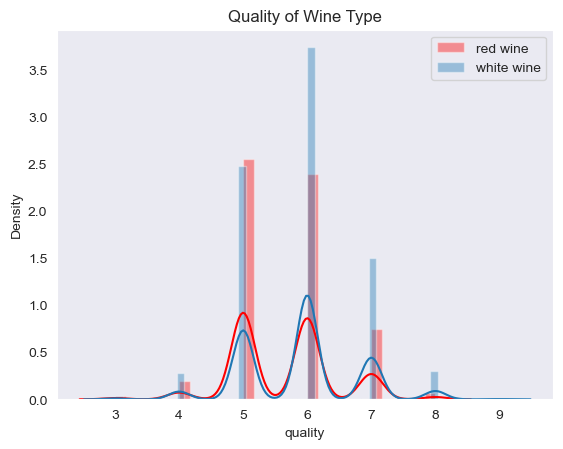

In [125]:
#히스토그램을 이용한 확률 밀도 함수
sns.set_style('dark') # 배경색 지정

# displot : 히스토그램+커널 밀도 추정(KDE) : 데이터의 분포를 시각화 하기 위한 그래프
# kde= True로 하면 꺽은선 그래프의 커널 밀도 추정이 표시됨
#히스토그램 (histogram): 데이터를 구간으로 나누어 각 구간에 속하는 데이터의 빈도를 막대 그래프로 표현합니다.
#커널 밀도 추정 (KDE, Kernel Density Estimation): 히스토그램의 매끄러운 버전으로, 데이터가 어떤 패턴을 가지는지 부드럽게 연결하여 나타냅니다.

sns.distplot(red_wine_quality, kde = True, color = "red", label = 'red wine')
sns.distplot(white_wine_quality, kde = True, label = 'white wine')

plt.title("Quality of Wine Type")
plt.legend()
plt.show()

#### 4.2 부분 회귀 플롯으로 시각화 하기
- fixed_acidity가 종속변수 quality에 미치는 영향력을 시각화 하기

In [129]:
import statsmodels.api as sm

In [131]:
# 부분 회귀에 사용한 독립 변수와 종속 변수를 제외한 나머지 변수 이름을 리스트로 추출
others = list(set(wine.columns).difference(set(["quality", "fixed_acidity"])))

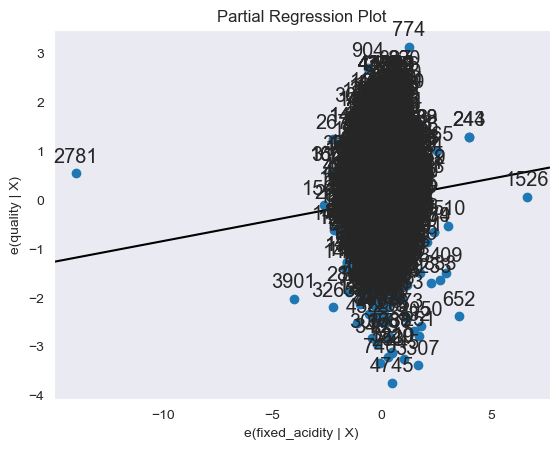

In [133]:
# 나머지 변수를 고정하고 fixed_acidity가 종속변수 품질에 미치는 영향에 부분회귀 수행
p, resids = sm.graphics.plot_partregress("quality", "fixed_acidity", 
                                         others, data = wine, ret_coords = True)
#ret_coords : 잔차 데이터 변환 여부

#### 부분 회귀(partial regression)
- 회귀 분석에서 특정 독립 변수의 영향을 다른 모든 독립 변수의 영향을 제거한 후에 분석하는 방법
- 특정 변수의 "순수한" 효과를 평가하고자 할 때 사용됩니다.

- 기본 개념
    - 회귀 분석: 여러 독립 변수가 종속 변수에 미치는 영향을 분석합니다.
    - 부분 회귀: 특정 독립 변수가 종속 변수에 미치는 영향을 평가할 때, 다른 독립 변수들의 영향을 통제합니다.
 
ret_coords = True: 이 인자를 True로 설정하면 잔차 데이터(회귀 분석의 잔차)와 회귀 예측 값이 반환됩니다.

#### 코드 분석하기
- p: 부분 회귀 그래프의 좌표
    - 구체적으로는, 독립 변수(fixed_acidity)와 종속 변수(quality) 간의 관계를 나타내는 부분 회귀 선의 예측값(예측된 종속 변수 값)을 포함
    - fixed_acidity의 변화에 따른 quality의 변화 경향을 시각적으로 보여줌
    
- resids : 잔차(residuals)
    - 종속 변수(quality)와 fixed_acidity의 회귀 분석에서 얻어진 잔차
    - 다른 모든 독립 변수들의 영향을 제거한 후 남은 오류 또는 변동을 의미
    - 잔차는 모델이 예측한 값과 실제 값의 차이
 
- 산점도 + 부분회귀선
    - 산점도 : 특정 독립 변수가 종속 변수에 미치는 순수한 영향을 시각적으로 확인
    - 부분 회귀선 : 산점도 위에 회귀선을 추가하여, 두 변수 간의 관계를 시각적으로 나타냄

#### 각 독립 변수가 종속 변수 quality에 미치는 영향력을 시각화

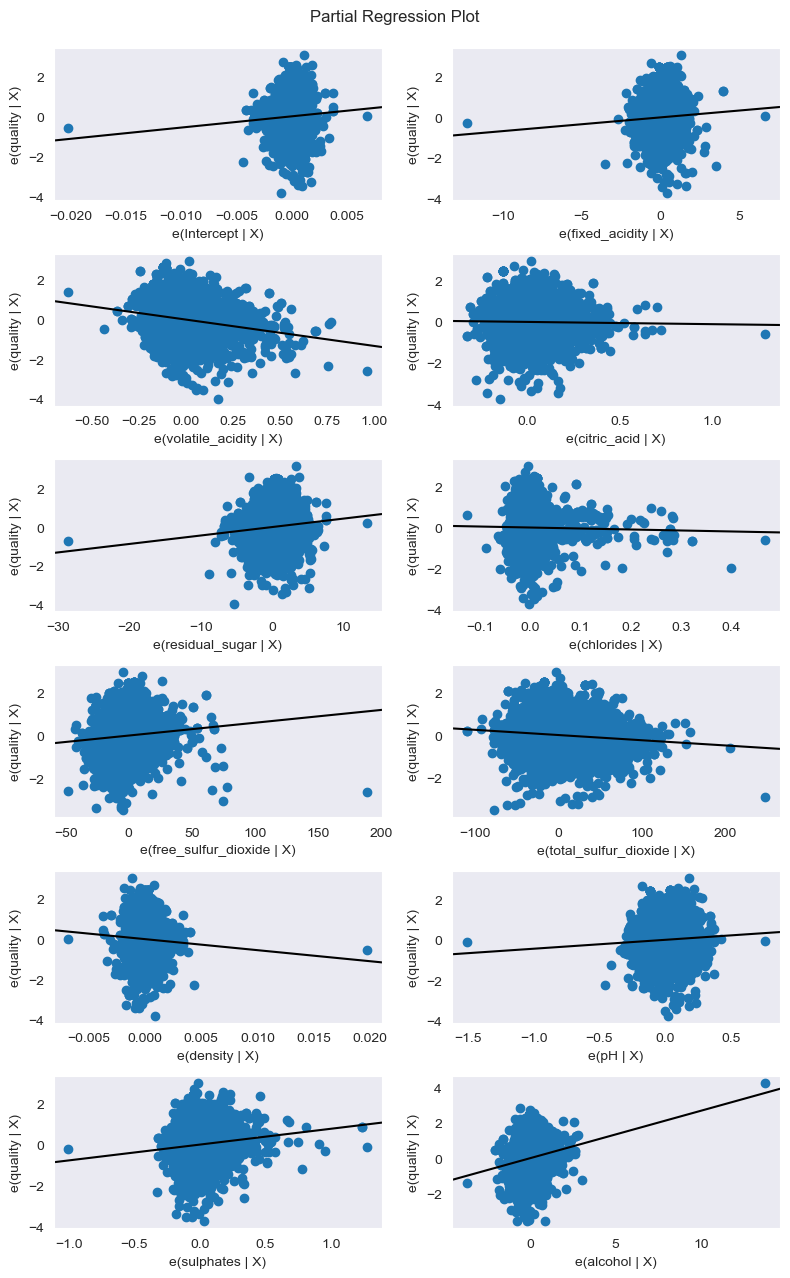

In [139]:
fig = plt.figure(figsize = (8, 13))
sm.graphics.plot_partregress_grid(regression_result, fig = fig)
plt.show()